<a href="https://colab.research.google.com/github/b62mp1/ExistingResults/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
pip install yfinance

In [51]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [53]:
import datetime as dt

today=dt.date.today()

startDate=today-dt.timedelta(days=5*365)

In [54]:
df = pdr.get_data_yahoo("TSLA", start=str(startDate), end=today)
print(df)

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2016-12-12    38.560001    38.883999  ...    38.486000  12194500
2016-12-13    38.636002    40.256001  ...    39.630001  34119500
2016-12-14    39.748001    40.599998  ...    39.737999  20754500
2016-12-15    39.681999    40.147999  ...    39.515999  16098000
2016-12-16    39.616001    40.518002  ...    40.498001  18984500
...                 ...          ...  ...          ...       ...
2021-12-03  1084.790039  1090.579956  ...  1014.969971  30696300
2021-12-06  1001.510010  1021.640015  ...  1009.010010  27221000
2021-12-07  1044.199951  1057.670044  ...  1051.750000  18694900
2021-12-08  1052.709961  1072.380005  ...  1068.959961  13968800
2021-12-09  1060.640015  1062.489990  ...  1003.799988  19812832

[1258 rows x 6 columns]


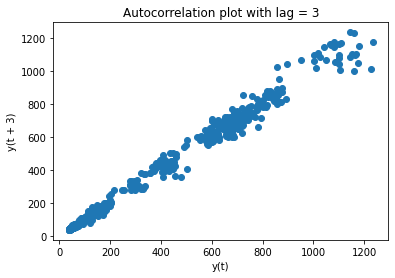

In [55]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('Autocorrelation plot with lag = 3')
plt.show()

In [56]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 655.3857014950416


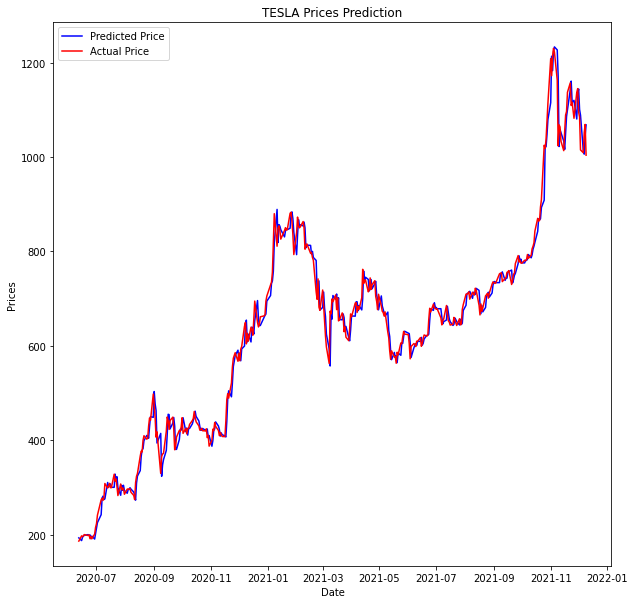

In [57]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(10,10))

plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()